##CREATION OF CNN MODEL FOR FASHION MNIST DATASET

### Load fashion mnist dataset using keras

In [0]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fmnist.load_data()


###Sample Fashion Mnist Training images

Text(0.5, 1.0, 'Training sample images')

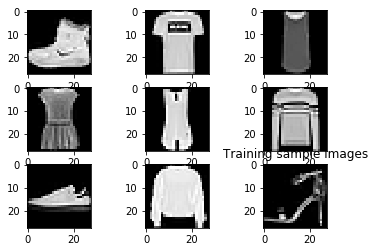

In [33]:
from matplotlib import pyplot as plt


for i in range(9):
  plt.subplot(330 + 1 +i)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))

  
plt.title('Training sample images')
  


###Sample Testing images

Text(0.5, 1.0, 'Test sample images')

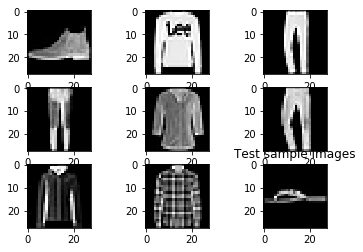

In [34]:
from matplotlib import pyplot as plt


for i in range(9):
  plt.subplot(330 + 1 +i)
  plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))

  
plt.title('Test sample images')
  

###Pre-processing of Training and Testing set

### Tensorflow model uses four dimensions
### image size of fashion mnist is 28 x28

In [0]:

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
## convert to floating point to process the data with tensorflow
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
## Normalization of gray-scale image
x_train/=255;
x_test/=255;

In [36]:
##displaying the size of training and testing set
print('Training set', x_train.shape)
print('Testing set', x_test.shape)

Training set (60000, 28, 28, 1)
Testing set (10000, 28, 28, 1)


###preparation of class labels using hot-one encoding technique

In [37]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]
print('Training set labels', y_train.shape)
print('Testing Set labels', y_test.shape)
print('Number of classes',num_classes)

Training set labels (60000, 10)
Testing Set labels (10000, 10)
Number of classes 10


###Creation of CNN model

###Convolution layers - 2 filter size 3x3, Subsampling using Maxpooling layer-1, Regularization using Dropout, Activation function -RELU

### Fully Connected layers-3 and the last layer is FC layer using Activation function SOFTMAX which is a logistic regression method which assigns the class labels 

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
from keras.optimizers import Adam
model =Sequential()
input_shape=(28,28,1)
model.add(Conv2D(32,kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes,activation='softmax'))

W0823 17:39:31.806124 139702075635584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 17:39:31.834039 139702075635584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 17:39:31.840454 139702075635584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 17:39:31.876294 139702075635584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0823 17:39:31.881824 139702075635584 deprecation_wrapp

## Model Compilation and display of model summary with all hyperparameters


### Optimizer used for minimizing the global cost function is Adam optimizer with a learning rate of 0.008

In [42]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0008),metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

##batch-size is set to 64 and number of epochs is 10 


In [0]:
batchsize=32
epochs1=10

###Fitting the training set to model

In [44]:
results=model.fit(x_train,y_train,batch_size=batchsize,epochs=epochs1,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.3722 - acc: 0.8657 - val_loss: 0.2999 - val_acc: 0.8885
Epoch 2/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.2707 - acc: 0.9019 - val_loss: 0.2525 - val_acc: 0.9078
Epoch 3/10
60000/60000 [==============================] - 213s 4ms/step - loss: 0.2245 - acc: 0.9179 - val_loss: 0.2393 - val_acc: 0.9125
Epoch 4/10
60000/60000 [==============================] - 211s 4ms/step - loss: 0.1899 - acc: 0.9294 - val_loss: 0.2295 - val_acc: 0.9189
Epoch 5/10
60000/60000 [==============================] - 209s 3ms/step - loss: 0.1666 - acc: 0.9388 - val_loss: 0.2208 - val_acc: 0.9219
Epoch 6/10
60000/60000 [==============================] - 211s 4ms/step - loss: 0.1464 - acc: 0.9447 - val_loss: 0.2279 - val_acc: 0.9236
Epoch 7/10
60000/60000 [==============================] - 213s 4ms/step - loss: 0.1289 - acc: 0.9519 - val_loss: 0.2275 - 

### Model Evaluation

In [45]:
score=model.evaluate(x_test,y_test,verbose=1)


print('Test Loss',score[0])
print('Test Accuracy',score[1])

10000/10000 [==============================] - 7s 693us/step
Test Loss 0.2515606963887811
Test Accuracy 0.9264


### Graphical representation of Loss Vs Epochs 


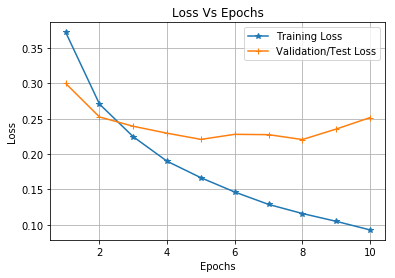

In [48]:
from matplotlib import pyplot as plt
results1=results.history
loss=results1['loss']
validationloss=results1['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,label='Training Loss',marker='*')
plt.plot(epochs,validationloss,label='Validation/Test Loss',marker='+')
plt.title('Loss Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



###Graphical representation of Accuracy Vs Epochs

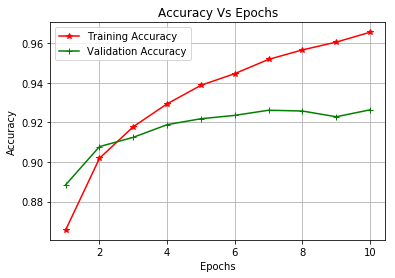

In [50]:
from matplotlib import pyplot as plt
results1=results.history
training_accuracy=results1['acc']
val_acc=results1['val_acc']
epochs1=range(1,len(training_accuracy)+1)
plt.plot(epochs1,training_accuracy,label='Training Accuracy',marker="*",color='r')
plt.plot(epochs1,val_acc,label='Validation Accuracy',marker="+",color='g')
plt.title('Accuracy Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


###Display of Confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix
import numpy as np
predicted=model.predict_classes(x_test)
print(confusion_matrix(np.argmax(y_test,axis=1),predicted))

[[862   1  23  15   3   2  93   0   1   0]
 [  1 975   0  20   0   0   1   0   3   0]
 [ 10   0 895   8  50   0  36   0   1   0]
 [  8   1  14 942  18   0  16   0   0   1]
 [  1   0  35  20 913   0  31   0   0   0]
 [  0   0   0   0   0 986   0   5   0   9]
 [ 66   0  57  27  71   0 771   0   8   0]
 [  0   0   0   0   0   8   0 964   0  28]
 [  4   1   1   5   3   1   1   3 981   0]
 [  1   0   0   0   0   3   0  21   0 975]]
